## Use of VFA methods
The goal of this notebook is to show if it is possible to use VFA methods in the Slimevolley gym environment.

In [1]:
from os.path import join
from slime import Slime
import pandas as pd
import numpy as np
import gym
import slimevolleygym
from algorithms import *

# Define our input folders and output files
DATADIR = join('..', 'data')

We get the csv file in which we saved the information of our centroids. In this case, we will use the 50K file.

In [2]:
centroids = pd.read_csv(join(DATADIR, 'c_25_mix.csv'))

We create the definition of the function for the feature vector, which is encapsulated in a Featurizer class.

In [3]:
slime_env = gym.make('SlimeVolley-v0')

In [4]:
featurizer = Featurizer(slime_env.observation_space, np.array(centroids), sigma=0.3)

In [5]:
ss_bsln = pd.read_csv(join(DATADIR, 'ss_bsln_900k.csv'))
ss_random = pd.read_csv(join(DATADIR, 'ss_random_100k.csv'))

ss = pd.concat([ss_bsln, ss_random], ignore_index=True).sample(frac=1).to_numpy()

x = featurizer.feature_vector(ss[0, :])

In [6]:
centroids.shape

(25000, 12)

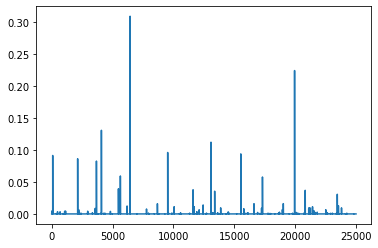

In [7]:
plt.plot(x)

### 25K centroids

In [8]:
def plot_vfa_results(history, history_average):
    ax = plt.subplot(111)
    plt.plot(history, label="retorno del episodio")
    plt.plot(history_average, label="retorno medio por episodio")
    plt.ylabel('Retorno completo', size=10)
    ax.legend(loc='lower right')
    plt.grid()
    plt.show()

In [9]:
q = LambdaValueFunction(featurizer, slime_env.action_space.n, 0.9)
slime_q, slime_history, slime_history_average = sarsa_lambda(slime_env, q, 1000, 1_000_000,
                                                            gamma=1, epsilon=0.1, alpha=0.1)

t = 50
t = 100
t = 150
t = 200
t = 250
t = 300
t = 350
t = 400
t = 450
t = 500
episodio 2: alfa = 0.09945449060084138, epsilon = 0.09945449060084138, retorno medio = -5.0
t = 550
t = 600
t = 650
t = 700
t = 750
t = 800
t = 850
t = 900
t = 950
t = 1000
t = 1050
t = 1100
t = 1150
t = 1200
t = 1250
t = 1300
t = 1350
t = 1400
t = 1450
t = 1500
t = 1550
t = 1600
t = 1650
episodio 4: alfa = 0.09836254618873064, epsilon = 0.09836254618873064, retorno medio = -5.0
t = 1700
t = 1750
t = 1800
t = 1850
t = 1900
t = 1950
t = 2000
t = 2050
t = 2100
t = 2150
t = 2200
t = 2250
t = 2300
t = 2350
t = 2400
t = 2450
t = 2500
t = 2550
t = 2600
t = 2650
t = 2700
t = 2750
t = 2800
t = 2850
episodio 6: alfa = 0.09718438429777657, epsilon = 0.09718438429777657, retorno medio = -5.0
t = 2900
t = 2950
t = 3000
t = 3050
t = 3100
t = 3150
t = 3200
t = 3250
t = 3300
t = 3350
t = 3400
t = 3450
t = 3500
t = 3550
t = 3600
t = 3650
t = 3700
t = 3750
t = 3800
t = 3850
t = 3900
t = 3950
t = 4000
t = 4050
t = 4100
t = 41

KeyboardInterrupt: 

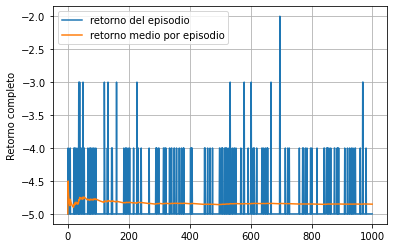

In [22]:
plot_vfa_results(slime_history, slime_history_average)

In [17]:
alpha = 0.001
beta = 0.005
v = ValueFunctionRB(featurizer)
pi = PolicyEstimator(featurizer, slime_env.action_space.n)
slime_pi, slime_history_b, slime_average_history_b, best_params = reinforce_baseline(slime_env, pi, v, 1000, 1_000_000,
                                                                         alpha, beta)

t = 50
t = 100
t = 150
t = 200
t = 250
t = 300
t = 350
t = 400
t = 450
t = 500
t = 550
t = 600
t = 650
t = 700
t = 750
t = 800
t = 850
t = 900
t = 950
t = 1000
t = 1050
t = 1100
t = 1150
episodio 2: alpha = 0.001, beta = 0.005, retorno medio = -5.0
t = 1200
t = 1250
t = 1300
t = 1350
t = 1400
t = 1450
t = 1500
t = 1550
t = 1600
t = 1650
t = 1700
t = 1750
t = 1800
t = 1850
t = 1900
t = 1950
t = 2000
t = 2050
t = 2100
t = 2150
t = 2200
t = 2250
t = 2300
t = 2350
t = 2400
episodio 4: alpha = 0.001, beta = 0.005, retorno medio = -5.0
t = 2450
t = 2500
t = 2550
t = 2600
t = 2650
t = 2700
t = 2750
t = 2800
t = 2850
t = 2900
t = 2950
t = 3000
t = 3050
t = 3100
t = 3150
t = 3200
t = 3250
t = 3300
t = 3350
t = 3400
t = 3450
t = 3500
t = 3550
t = 3600
t = 3650
episodio 6: alpha = 0.001, beta = 0.005, retorno medio = -4.833333333333333
t = 3700
t = 3750
t = 3800
t = 3850
t = 3900
t = 3950
t = 4000
t = 4050
t = 4100
t = 4150
t = 4200
t = 4250
t = 4300
t = 4350
t = 4400
t = 4450
episodio 8: alpha =

ValueError: too many values to unpack (expected 3)

In [ ]:
plot_vfa_results(slime_history_b, slime_average_history_b)

In [ ]:
env = gym.make('SlimeVolley-v0')
S = env.reset()
G = 0     
while True:
    action = slime_pi[S]
    obs, reward, done, info = env.step(action)
    env.render()